In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append('../modules/')

import funAdapt as fa

In [3]:
Nadapt_max = 50000
Nadapt_min = 10000
Ncheck = 5000
Nrepeat = 320
sigma = 1.5
theta_eta = 3.

delta_a = 0.05
Lambda = 0.9

dt = 1e-3

Nsteps_array = np.array([3, 4, 5, 6, 7])
Nsteps_array = 10**Nsteps_array

# Data save

In [5]:
a_adapt_final = np.zeros((Nsteps_array.size, Nrepeat))

for i in range(len(Nsteps_array)):
    Ixy_adapt = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adapt_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    a_adapt_final[i, :] = abs(a_adapt[:, -1])
    
np.save(f'../data/adapt_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy', a_adapt_final)

# Tests

1000


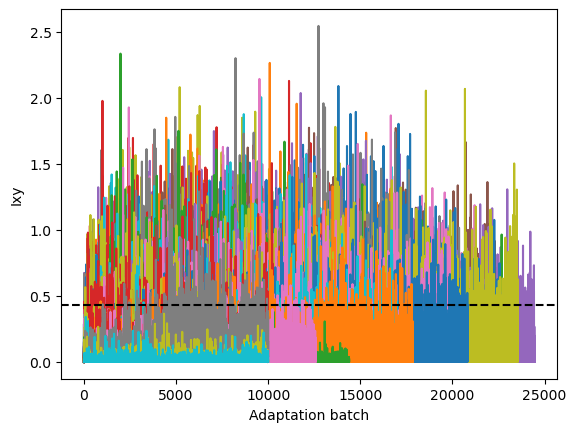

Final Ixy: 0.006994894200123768 +- 0.016638006123655125


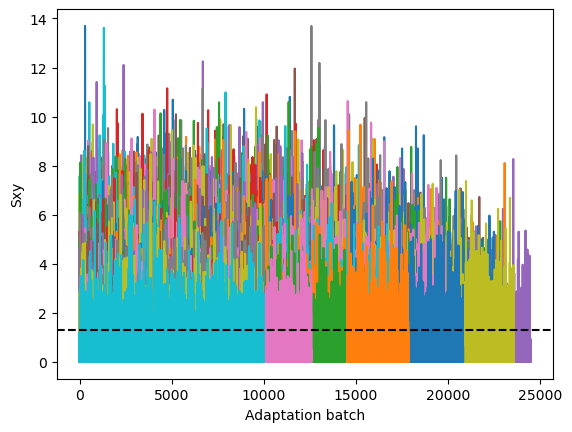

Final Sxy: 0.41450307800403047 +- 0.7156305414493997


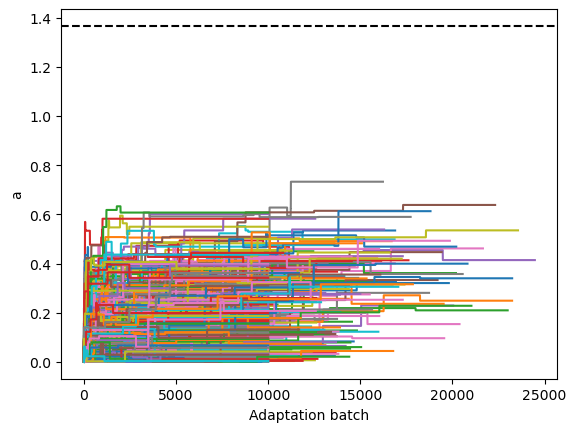

Final time: 12356.796875 +- 3185.2679438887453
Final a: 0.23305895093862866 +- 0.1507272958478341


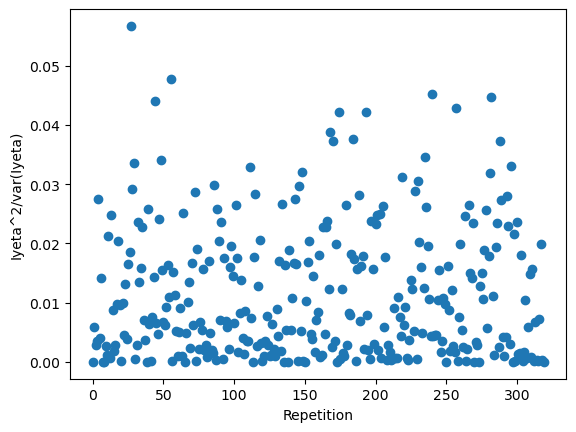

CV: 0.011393691228904882 +- 0.011167959602749687

10000


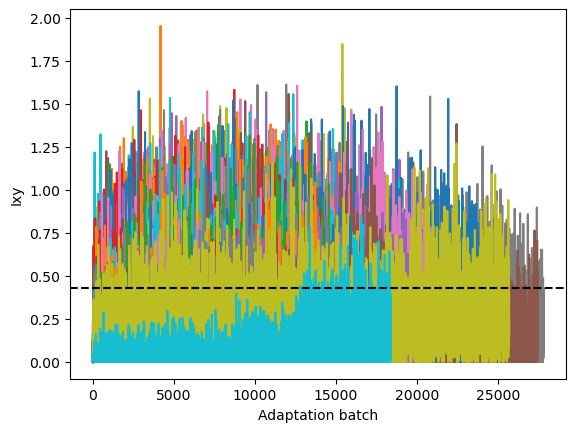

Final Ixy: 0.06721164415056752 +- 0.07924362642723436


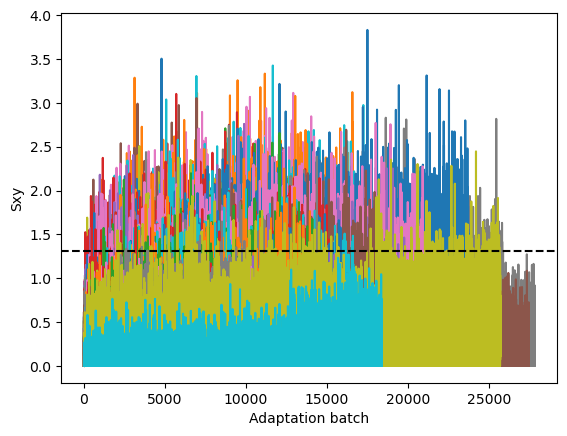

Final Sxy: 0.11558385101487967 +- 0.1534627246525754


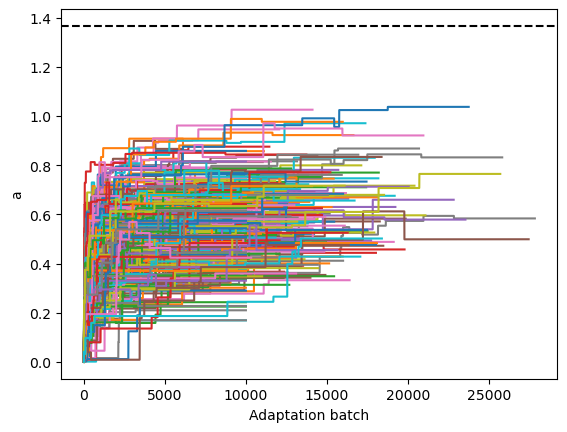

Final time: 12738.165625 +- 3415.8001214127503
Final a: 0.5637532259132934 +- 0.15205866165775367


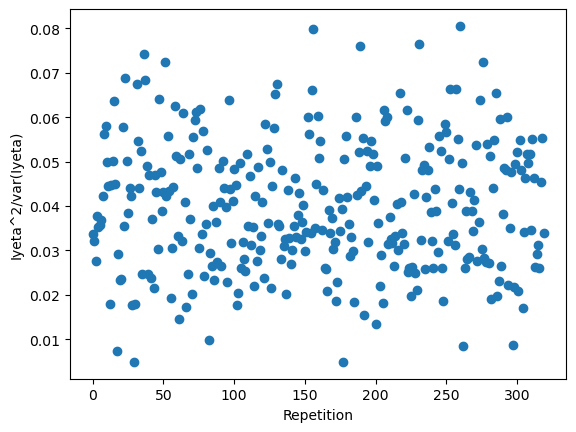

CV: 0.039989116559397665 +- 0.014601695708615556

100000


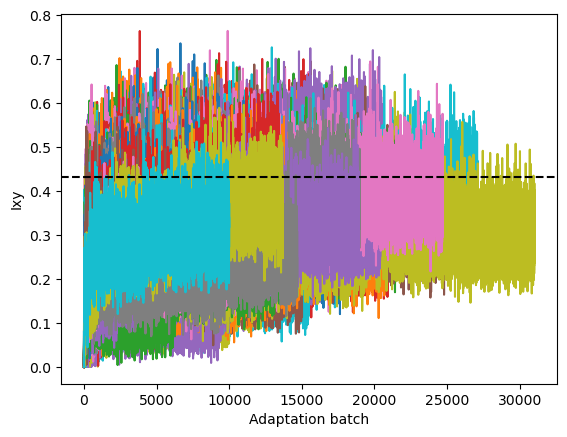

Final Ixy: 0.28064699927479375 +- 0.057329652201053266


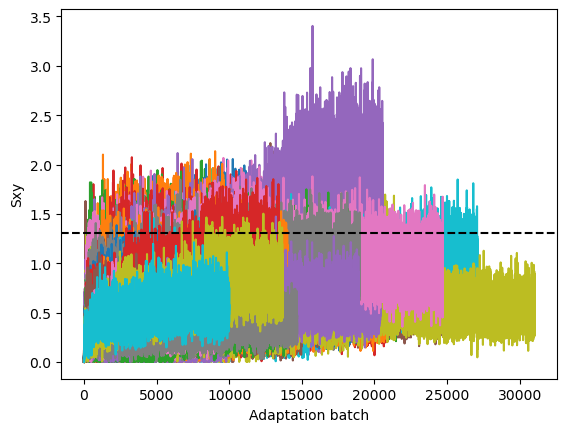

Final Sxy: 0.5069764170962628 +- 0.15531706689912578


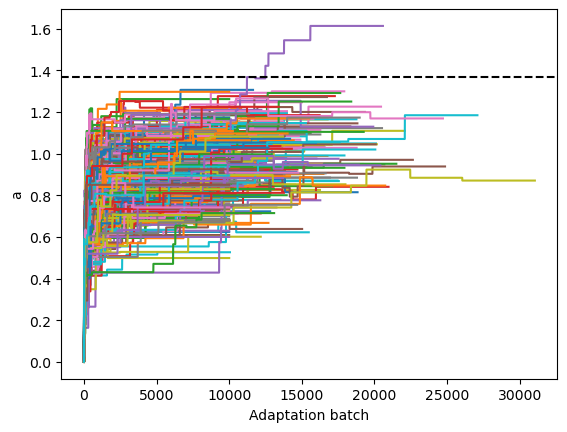

Final time: 12785.24375 +- 3556.9728144991404
Final a: 0.9552042285133184 +- 0.15957323074229568


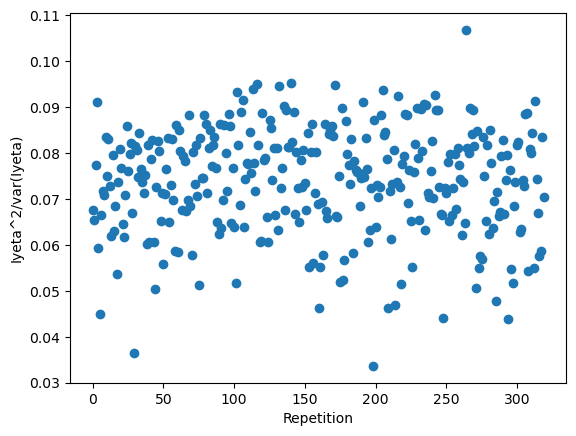

CV: 0.07387699956530676 +- 0.011616133431490372

1000000


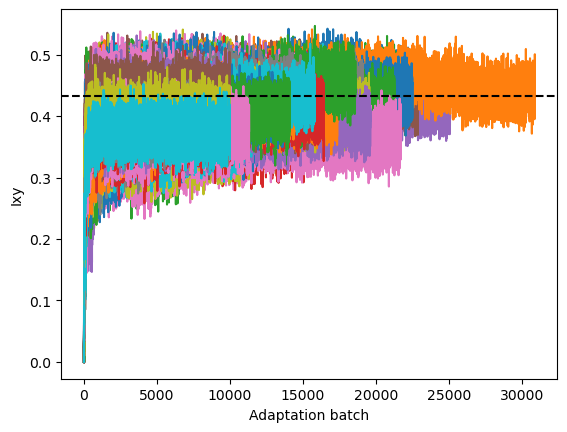

Final Ixy: 0.37068264712203086 +- 0.029578246626678843


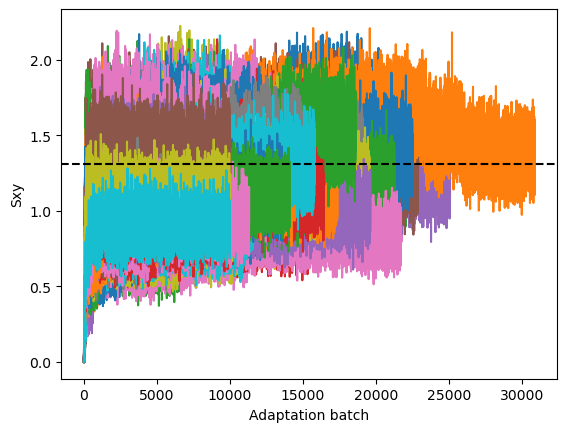

Final Sxy: 0.8850643559867799 +- 0.11917319088013037


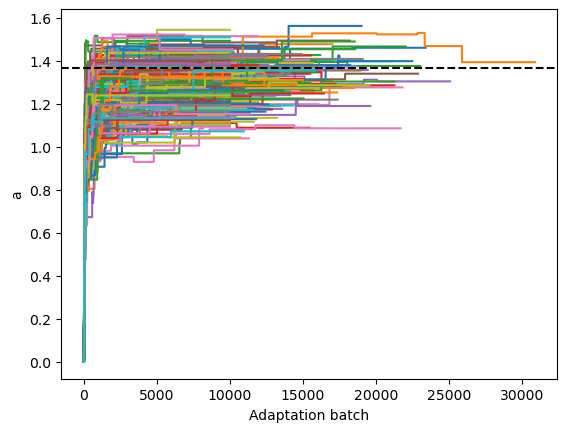

Final time: 12296.10625 +- 3252.7249318780305
Final a: 1.2929554360911828 +- 0.09783102244964625


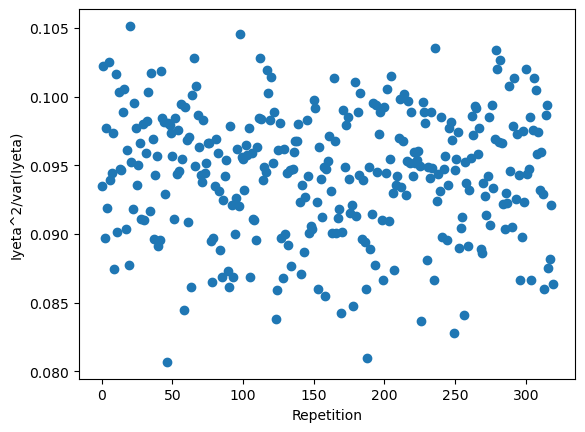

CV: 0.09441284383456364 +- 0.00459657712047756

10000000


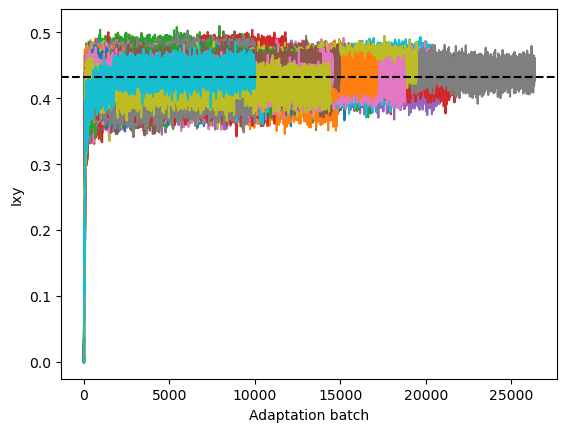

Final Ixy: 0.4323321082403309 +- 0.030353017224000366


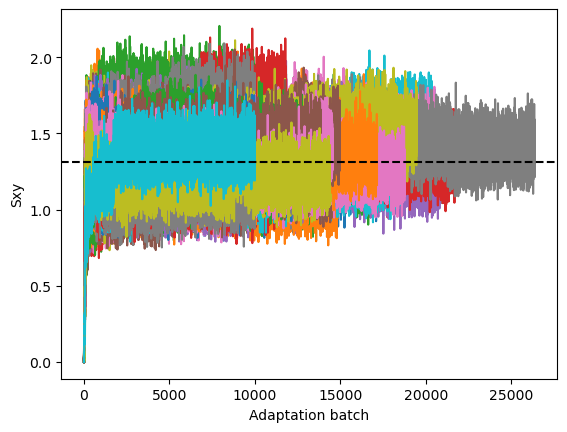

Final Sxy: 1.3346136954975443 +- 0.16896572981711042


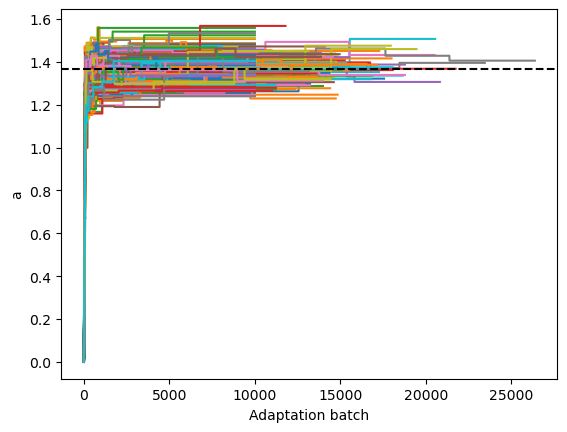

Final time: 11769.34375 +- 2689.445420404723
Final a: 1.37110832243421 +- 0.05913520516247242


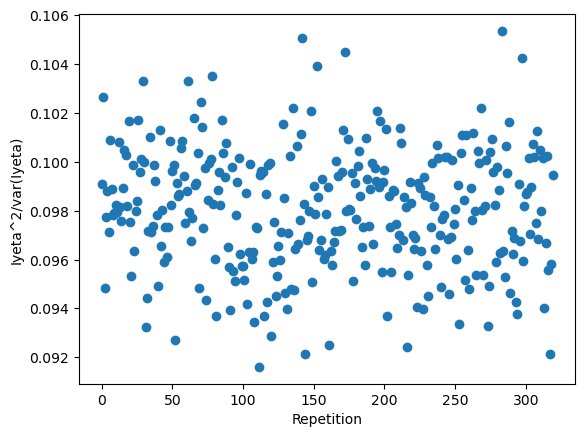

CV: 0.09805304515128317 +- 0.0024563711919511557



In [4]:
aopt = 1.366

for i in range(len(Nsteps_array)):
    print(Nsteps_array[i])
    Ixy_adapt = np.load(f'../data/adapt_Ixy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    Sxy_adapt = np.load(f'../data/adapt_Sxy_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    a_adapt = np.load(f'../data/adapt_a_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
    stop_time_adapt = np.load(f'../data/adapt_stopTime_Nsteps{Nsteps_array[i]}_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')

    Ixy_adapt[Ixy_adapt < 0] = 0
    Sxy_adapt[Sxy_adapt < 0] = 0

    for j in range(Nrepeat):
        Ixy_curr = Ixy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Ixy_curr/(Nsteps_array[i]))
    plt.axhline(fa.Ixy_exact(sigma, aopt, theta_eta), color='k', linestyle='--')
    plt.xlabel("Adaptation batch")
    plt.ylabel("Ixy")
    plt.show()

    print("Final Ixy:", np.mean(Ixy_curr/(Nsteps_array[i])), "+-", np.std(Ixy_curr/(Nsteps_array[i])))
    
    for j in range(Nrepeat):
        Sxy_curr = Sxy_adapt[j, :stop_time_adapt[j]]
        plt.plot(Sxy_curr/(Nsteps_array[i]))
    plt.axhline(fa.Sxy_exact(sigma, aopt, theta_eta), color='k', linestyle='--')
    plt.xlabel("Adaptation batch")
    plt.ylabel("Sxy")
    plt.show()

    print("Final Sxy:", np.mean(Sxy_curr/(Nsteps_array[i])), "+-", np.std(Sxy_curr/(Nsteps_array[i])))

    a_final = np.zeros(Nrepeat)
    for j in range(Nrepeat):
        a_curr = a_adapt[j, :stop_time_adapt[j]]
        plt.plot(abs(a_curr))
        a_final[j] = abs(a_curr[-1])
    plt.axhline(aopt, color='k', linestyle='--')
    plt.xlabel("Adaptation batch")
    plt.ylabel("a")
    plt.show()

    print("Final time:", np.mean(stop_time_adapt), "+-", np.std(stop_time_adapt))
    print("Final a:", np.mean(a_final), "+-", np.std(a_final))

    Stot = np.zeros(Nrepeat)
    Iyeta = np.zeros(Nrepeat)
    timetot = np.zeros(Nrepeat)

    for j in range(Nrepeat):
        timetot[j] = Nsteps_array[i]*stop_time_adapt[j]*dt
        Stot[j] = fa.Sxy_exact(sigma, a_final[j], theta_eta)*timetot[j]
        Iyeta[j] = fa.Iyeta_exact(sigma, a_final[j], theta_eta)

    CV = Iyeta**2/(1 - np.exp(-2*Iyeta))
    plt.scatter(range(Nrepeat), CV)
    plt.xlabel("Repetition")
    plt.ylabel("Iyeta^2/var(Iyeta)")
    plt.show()
    print("CV:", np.mean(CV), "+-", np.std(CV))
    print()

# Figure 3

In [4]:
sys.path.append('../../lib/')
import funPlots as fplot

fplot.master_format(ncols = 2, nrows = 2)

In [6]:
a_final = np.load(f'../data/adapt_a_final_sigma{sigma}_theta{theta_eta}_delta{delta_a}_Lambda{Lambda}_NadaptMax{Nadapt_max}_NadaptCheck{Ncheck}.npy')
a_space = np.linspace(0, 1.8, 2500)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 

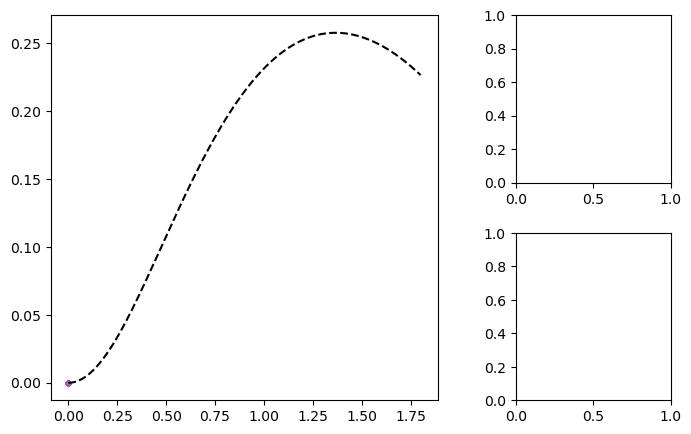

In [7]:
fig, axs = plt.subplot_mosaic([['main', 'main', "s1"],
                               ['main', 'main', "s2"]], figsize=(8, 5))

plt.subplots_adjust(wspace=0.5, hspace=0.3)

axs['main'].plot(a_space, fa.functional_exact(sigma, a_space, theta_eta, Lambda), 'k--')

for i in range(len(Nsteps_array)):
    axs['main'].scatter(a_final[i, :], fa.functional_exact(sigma, a_final[i, :], theta_eta, Lambda), s=10, label=f'Nsteps={Nsteps_array[i]}')
    print(a_final[i,:])